In [1]:
!git clone https://github.com/swapniel99/ezio.git

fatal: destination path 'ezio' already exists and is not an empty directory.


In [2]:
%cd ezio

/content/ezio


In [3]:
import torch
import torch.optim as optim
from tqdm import tqdm
import numpy as np

!pip install torchsummary
from torchsummary import summary

from ezio.data import dataset 
from ezio.data.data_transforms.session_9 import transformations
from ezio.runner import engine
from ezio.utils import loss
from ezio.utils import lr_finder

In [4]:
# !pip install albumentations==0.4.6
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-4caosl02
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-4caosl02
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=3e94a39ba1de9680854731269e1408b9bfe37c9b953d055be4b34555dd5e1891
  Stored in directory: /tmp/pip-ephem-wheel-cache-jspemyul/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [5]:
train_transforms = transformations.perform_transformations(train=True, is_numpy=True)
test_transforms = transformations.perform_transformations(train=False, is_numpy=True)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [7]:
train_set, valid_set = dataset.cifar10_dataset(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
train_loader, valid_loader = dataset.create_loaders(train_set, valid_set, train_batch_size=64, valid_batch_size=64, num_workers=4)

In [9]:
from ezio.model.session_9.model import ResNet18
model = ResNet18().to(device)

In [10]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.47E-02


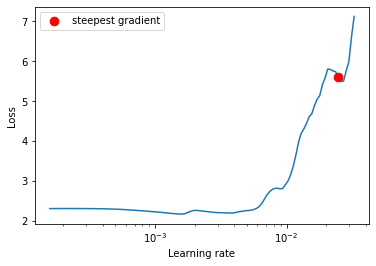

In [11]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
lr_finder = lr_finder.LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, val_loader=valid_loader, end_lr=1, num_iter=200, step_mode="exp")
lr_finder.plot(log_lr=True)
lr_finder.reset()
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)
#loss_function = loss.cross_entropy_loss()

In [12]:
best_lr = 2.47e-2
best_lr

0.0247

In [13]:
optimizer = optim.SGD(model.parameters(), lr=best_lr, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)
loss_function = loss.cross_entropy_loss()

In [14]:
train_acc, train_losses, test_acc, test_losses = engine.fit(model, train_loader, valid_loader, loss_function, device, optimizer, 50, scheduler)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.9257618188858032 Batch_id=781 Accuracy=32.00: 100%|██████████| 782/782 [00:31<00:00, 24.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 4508/10000 (45.08%)

EPOCH: 2


Loss=1.3568766117095947 Batch_id=781 Accuracy=46.00: 100%|██████████| 782/782 [00:31<00:00, 24.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 5469/10000 (54.69%)

EPOCH: 3


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 6171/10000 (61.71%)

EPOCH: 4


Loss=1.3142342567443848 Batch_id=781 Accuracy=60.00: 100%|██████████| 782/782 [00:31<00:00, 24.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0145, Accuracy: 6728/10000 (67.28%)

EPOCH: 5


Loss=1.177354097366333 Batch_id=781 Accuracy=64.00: 100%|██████████| 782/782 [00:31<00:00, 24.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 7068/10000 (70.68%)

EPOCH: 6


Loss=0.9175974726676941 Batch_id=781 Accuracy=67.00: 100%|██████████| 782/782 [00:31<00:00, 24.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 7471/10000 (74.71%)

EPOCH: 7


Loss=0.698612630367279 Batch_id=781 Accuracy=70.00: 100%|██████████| 782/782 [00:31<00:00, 24.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 7738/10000 (77.38%)

EPOCH: 8


Loss=1.0619806051254272 Batch_id=781 Accuracy=72.00: 100%|██████████| 782/782 [00:31<00:00, 24.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 7838/10000 (78.38%)

EPOCH: 9


Loss=1.1886848211288452 Batch_id=781 Accuracy=73.00: 100%|██████████| 782/782 [00:31<00:00, 24.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8084/10000 (80.84%)

EPOCH: 10


Loss=0.7866385579109192 Batch_id=781 Accuracy=75.00: 100%|██████████| 782/782 [00:31<00:00, 24.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 8134/10000 (81.34%)

Epoch    10: reducing learning rate of group 0 to 1.2350e-02.
EPOCH: 11


Loss=1.1653729677200317 Batch_id=781 Accuracy=79.00: 100%|██████████| 782/782 [00:31<00:00, 24.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8404/10000 (84.04%)

EPOCH: 12


Loss=0.5919535756111145 Batch_id=781 Accuracy=80.00: 100%|██████████| 782/782 [00:31<00:00, 24.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 8504/10000 (85.04%)

EPOCH: 13


Loss=0.7375305891036987 Batch_id=781 Accuracy=81.00: 100%|██████████| 782/782 [00:31<00:00, 24.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8506/10000 (85.06%)

Epoch    13: reducing learning rate of group 0 to 6.1750e-03.
EPOCH: 14


Loss=0.22629708051681519 Batch_id=781 Accuracy=83.00: 100%|██████████| 782/782 [00:31<00:00, 24.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8625/10000 (86.25%)

EPOCH: 15


Loss=0.5478691458702087 Batch_id=781 Accuracy=84.00: 100%|██████████| 782/782 [00:31<00:00, 24.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8658/10000 (86.58%)

Epoch    15: reducing learning rate of group 0 to 3.0875e-03.
EPOCH: 16


Loss=0.3504972457885742 Batch_id=781 Accuracy=85.00: 100%|██████████| 782/782 [00:31<00:00, 24.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8734/10000 (87.34%)

EPOCH: 17


Loss=0.8288164734840393 Batch_id=781 Accuracy=86.00: 100%|██████████| 782/782 [00:31<00:00, 24.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8766/10000 (87.66%)

EPOCH: 18


Loss=0.7356300354003906 Batch_id=781 Accuracy=86.00: 100%|██████████| 782/782 [00:31<00:00, 24.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8734/10000 (87.34%)

Epoch    18: reducing learning rate of group 0 to 1.5437e-03.
EPOCH: 19


Loss=0.13880056142807007 Batch_id=781 Accuracy=87.00: 100%|██████████| 782/782 [00:31<00:00, 24.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8771/10000 (87.71%)

Epoch    19: reducing learning rate of group 0 to 7.7187e-04.
EPOCH: 20


Loss=0.28255581855773926 Batch_id=781 Accuracy=87.00: 100%|██████████| 782/782 [00:31<00:00, 24.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8807/10000 (88.07%)

EPOCH: 21


Loss=0.3360389173030853 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8815/10000 (88.15%)

Epoch    21: reducing learning rate of group 0 to 3.8594e-04.
EPOCH: 22


Loss=0.298858106136322 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8805/10000 (88.05%)

Epoch    22: reducing learning rate of group 0 to 1.9297e-04.
EPOCH: 23


Loss=0.514662504196167 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8795/10000 (87.95%)

Epoch    23: reducing learning rate of group 0 to 9.6484e-05.
EPOCH: 24


Loss=0.08653989434242249 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8810/10000 (88.10%)

Epoch    24: reducing learning rate of group 0 to 4.8242e-05.
EPOCH: 25


Loss=0.930925726890564 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8819/10000 (88.19%)

Epoch    25: reducing learning rate of group 0 to 2.4121e-05.
EPOCH: 26


Loss=0.431348592042923 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8821/10000 (88.21%)

Epoch    26: reducing learning rate of group 0 to 1.2061e-05.
EPOCH: 27


Loss=0.43380206823349 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8827/10000 (88.27%)

Epoch    27: reducing learning rate of group 0 to 6.0303e-06.
EPOCH: 28


Loss=0.4705893397331238 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8815/10000 (88.15%)

Epoch    28: reducing learning rate of group 0 to 3.0151e-06.
EPOCH: 29


Loss=0.19745662808418274 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8826/10000 (88.26%)

Epoch    29: reducing learning rate of group 0 to 1.5076e-06.
EPOCH: 30


Loss=0.4086655080318451 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8810/10000 (88.10%)

Epoch    30: reducing learning rate of group 0 to 7.5378e-07.
EPOCH: 31


Loss=0.26690593361854553 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8811/10000 (88.11%)

Epoch    31: reducing learning rate of group 0 to 3.7689e-07.
EPOCH: 32


Loss=0.2580055296421051 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:32<00:00, 24.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8811/10000 (88.11%)

Epoch    32: reducing learning rate of group 0 to 1.8845e-07.
EPOCH: 33


Loss=1.0998871326446533 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8813/10000 (88.13%)

Epoch    33: reducing learning rate of group 0 to 9.4223e-08.
EPOCH: 34


Loss=0.3566107451915741 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8825/10000 (88.25%)

Epoch    34: reducing learning rate of group 0 to 4.7112e-08.
EPOCH: 35


Loss=0.4136340022087097 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8814/10000 (88.14%)

Epoch    35: reducing learning rate of group 0 to 2.3556e-08.
EPOCH: 36


Loss=0.3473118841648102 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8816/10000 (88.16%)

Epoch    36: reducing learning rate of group 0 to 1.1778e-08.
EPOCH: 37


Loss=0.8371279239654541 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8816/10000 (88.16%)

EPOCH: 38


Loss=0.32284823060035706 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8824/10000 (88.24%)

EPOCH: 39


Loss=0.7887535691261292 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8819/10000 (88.19%)

EPOCH: 40


Loss=0.40289920568466187 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.73it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8833/10000 (88.33%)

EPOCH: 41


Loss=0.6649284958839417 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8816/10000 (88.16%)

EPOCH: 42


Loss=0.31922006607055664 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8827/10000 (88.27%)

EPOCH: 43


Loss=0.3946220576763153 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8813/10000 (88.13%)

EPOCH: 44


Loss=0.48132163286209106 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8813/10000 (88.13%)

EPOCH: 45


Loss=0.570182740688324 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8813/10000 (88.13%)

EPOCH: 46


Loss=0.13884635269641876 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8813/10000 (88.13%)

EPOCH: 47


Loss=0.36557114124298096 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8808/10000 (88.08%)

EPOCH: 48


Loss=0.6505606770515442 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8813/10000 (88.13%)

EPOCH: 49


Loss=0.7071112394332886 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8796/10000 (87.96%)

EPOCH: 50


Loss=0.19728878140449524 Batch_id=781 Accuracy=88.00: 100%|██████████| 782/782 [00:31<00:00, 24.72it/s]



Test set: Average loss: 0.0060, Accuracy: 8825/10000 (88.25%)



In [15]:
from google.colab import drive
drive.mount('/content/gdrive')
model_save_name = 'saved_model.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)

Mounted at /content/gdrive


In [16]:
model_save_name = 'saved_model.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5257920208>


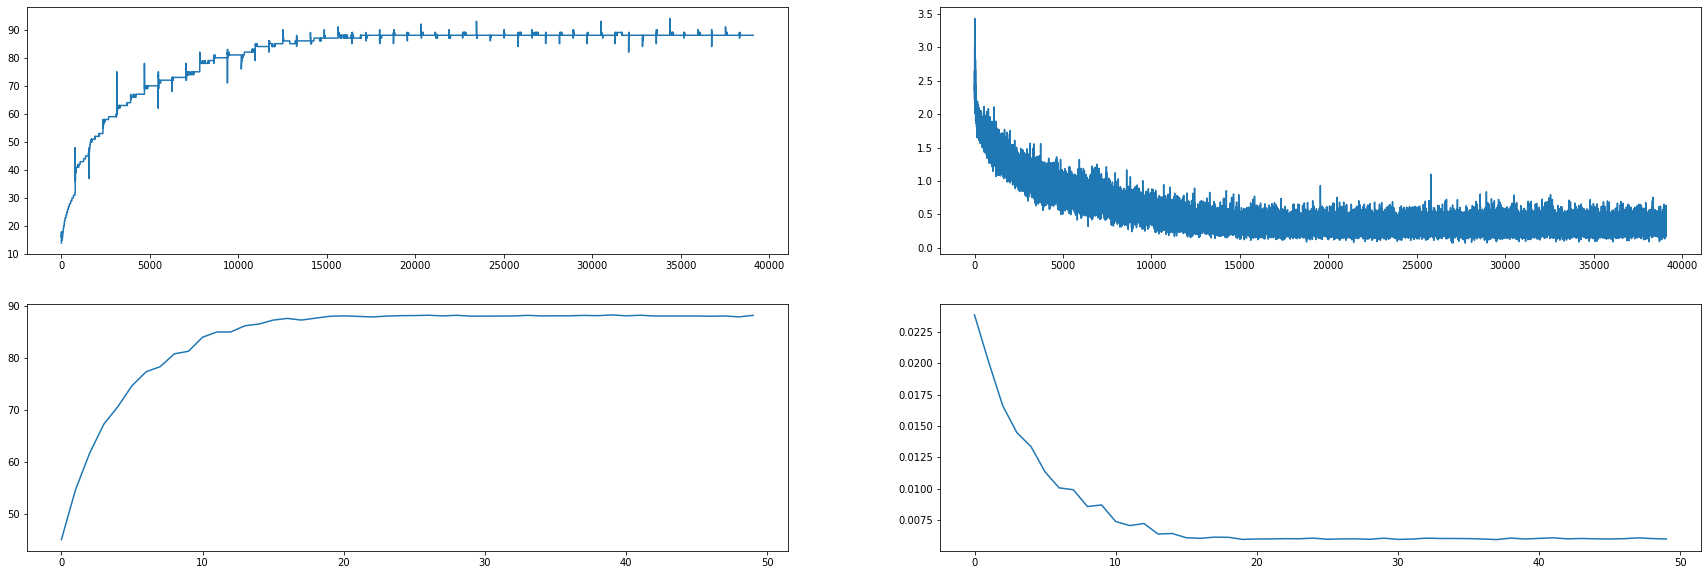

In [17]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(30,10))
print(axs)
axs[0][0].plot(train_acc, label = "train_acc")
axs[0][1].plot(train_losses, label = "train_losses")
axs[1][0].plot(test_acc, label = "test_acc")
axs[1][1].plot(test_losses, label = "test_losses")
# axs[0].legend()
# axs[0].set_title("Training Loss")

In [25]:
# path = "sample_model.pth"
# torch.save(model, path)

In [27]:
# Load the model
# loaded_model = torch.load('sample_model.pt')
loaded_model = model

## GradCam Integration

In [28]:
from ezio.utils.gradcam.generate_images import gradcam_features, plot_grid

In [29]:
## Cifar-10 classes
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [30]:
def misclassified_images(model, device, test_loader):
    model.eval()
    result = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            prediction_ = pred.squeeze(-1)
            target_ = target.view_as(pred).squeeze(-1)
            for i in range(pred.size(0)):
              if prediction_[i]!=target_[i]:
                result.append([prediction_[i], target_[i], data[i]])
    return result

def plot_wrong_images(result):
  fig = plt.figure(figsize = (10,10))
  for i in range(25):
        sub = fig.add_subplot(5, 5, i+1)
        plt.imshow(result[i][2].cpu().numpy().squeeze(),cmap='gray',interpolation='none')
        sub.set_title("Pred={}, Act={}".format(str(result[i][0].data.cpu().numpy()),str(result[i][1].data.cpu().numpy())))
  plt.tight_layout()
  plt.show()

result = misclassified_images(model, device, valid_loader)
#plot_wrong_images(result)

In [21]:
## Sample images
predicted_labels, target_classes, images = next(iter(result))

In [22]:
## Generate grid
target_layers = ["layer1", "layer2", "layer3", "layer4"]
predicted_probs, predicted_labels, gradcam_outputs = gradcam_features(loaded_model, target_layers, images, target_classes, device)
plot_grid(gradcam_outputs, images, target_classes, predicted_labels, class_names, (3, 32, 32))

NameError: ignored